# Problem 1 (ML; 60 min)

a) In your function `calc_linear_approximation_coefficients(data, initial_guess)`, include an optional argument `plotting=False`. If set to `True`, then show a plot of the data along with the linear approximation at each iteration of the gradient descent. A plotting function is provided for you, below.

Try it on each of the following datasets:

```
data1 = [(0, -2.7), (1, -0.01), (2, 3.28), (3, 7.07), (4, 10.99), (5, 13.51), (6, 14.75), (7, 17.93), (8, 21.65), (9, 25.48)]
data2 = [(0, 0.41), (1, 1.37), (2, 6.41), (3, 14.49), (4, 18.24), (5, 35.24), (6, 38.84), (7, 63.0), (8, 73.97), (9, 96.11)]
data3 = [(0, 0.12), (1, 4.32), (2, 5.41), (3, 0.74), (4, -3.29), (5, -4.16), (6, -1.38), (7, 3.77), (8, 5.65), (9, 2.7)]
```


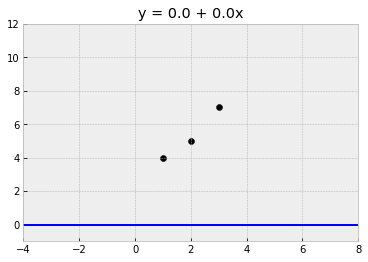

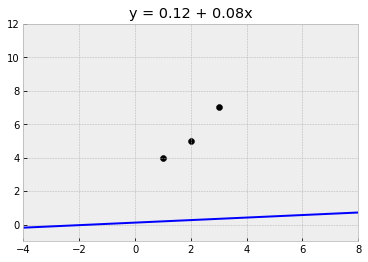

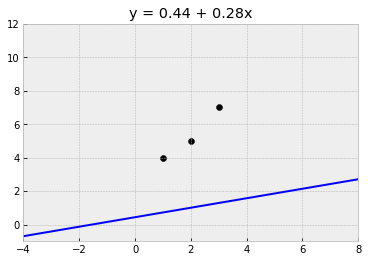

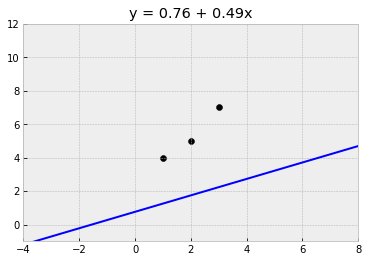

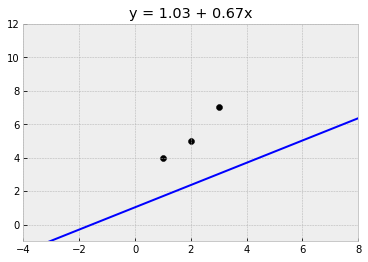

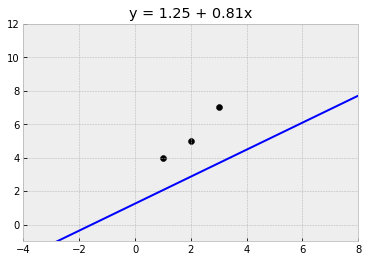

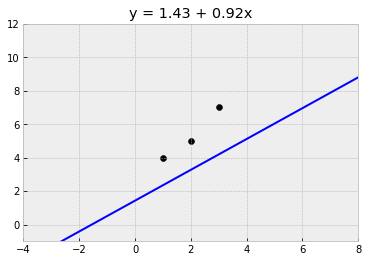

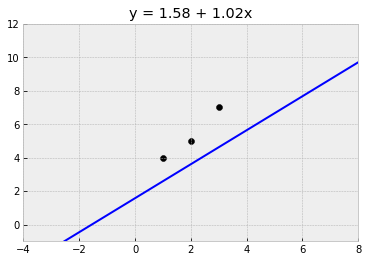

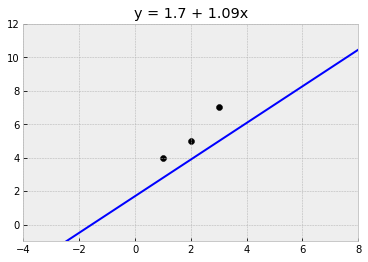

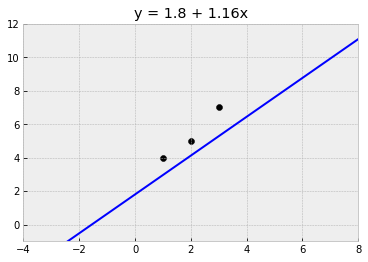

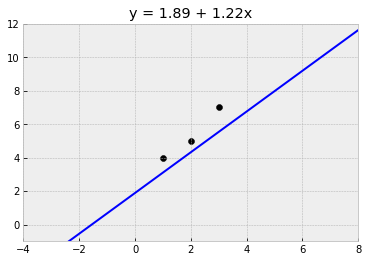

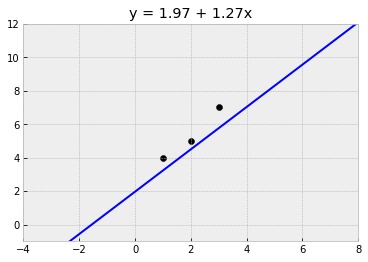

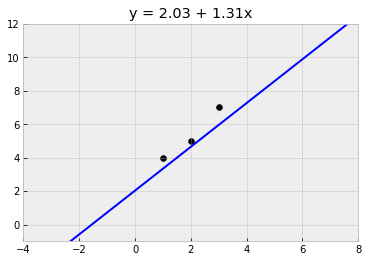

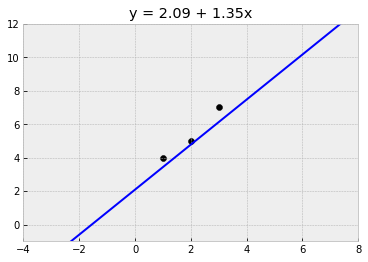

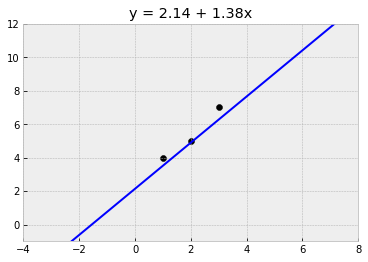

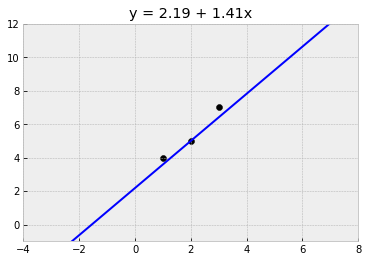

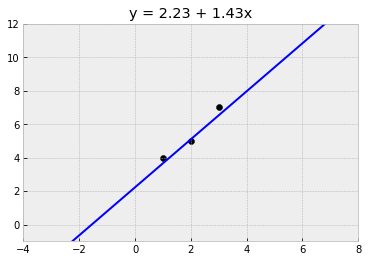

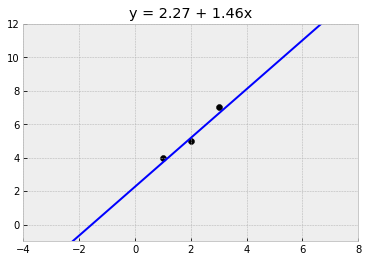

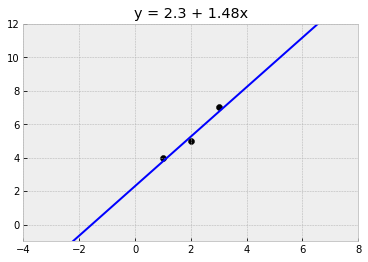

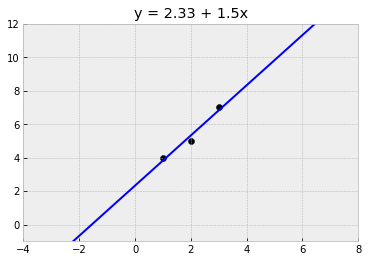

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

def plot_linear_approximation(beta_0, beta_1, data, title=None, padding=5):
    x_coords_data = [point[0] for point in data]
    y_coords_data = [point[1] for point in data]
    x_min_data, x_max_data = min(x_coords_data), max(x_coords_data)
    y_min_data, y_max_data = min(y_coords_data), max(y_coords_data)

    line_endpoints_x_coords = [x_min_data-padding, x_max_data+padding]
    line_endpoints_y_coords = [beta_0 + beta_1 * x for x in line_endpoints_x_coords]

    plt.scatter(x_coords_data, y_coords_data, color='black')
    plt.plot(line_endpoints_x_coords, line_endpoints_y_coords, color='blue')
    plt.xlim(x_min_data-padding, x_max_data+padding)
    plt.ylim(y_min_data-padding, y_max_data+padding)
    plt.title(title)
    plt.show()

data = [(1,4), (2,5), (3,7)]
beta_0_sequence = [2.33 * (1-1/n+1/20)**5 for n in range(1,21)]
beta_1_sequence = [1.5 * (1-1/n+1/20)**5 for n in range(1,21)]

for beta_0, beta_1 in zip(beta_0_sequence, beta_1_sequence):
    title = 'y = {} + {}x'.format(round(beta_0,2), round(beta_1,2))
    plot_linear_approximation(beta_0, beta_1, data, title=title)

b) Create a function `calc_best_linear_approximation_coefficients(data)` that evaluates `calc_linear_approximation_coefficients(data, initial_guess)` using "grid search" on ~`100` initial guesses, where `beta_0` and `beta_1` cover all combinations of even numbers between `-10` and `10`. Use `precision=0.01` so that each linear approximation runs in less than a second. Then, return the coefficients that yielded the lowest error.

c) Suppose that

* Eli plays Space Empires for 10 hours and reaches a skill level of 4
* David plays Space Empires for 40 hours and reaches a skill level of 10
* Colby plays Space Empires for 100 hours and reaches a skill level of 20
* George plays Space Empires for 50 hours and reaches a skill level of 15
* Riley plays space empires for 80 hours and reaches a skill level of 25

i) Using `calc_best_linear_approximation_coefficients`, what is the linear approximation for the data?

> Your answer here

ii) Assuming the relationship between playing hours and skill level is linear, if Justin plays Space Empires for 30 hours, approximately what skill level will he reach? Use the linear approximation from part (i).

> Your answer here

# Problem 2 (DS/Algo; 60 min)

Extend your `Tree` class.

a) Write a method `insert(new_tree, parent_node_value)` that takes a `new_tree` instance and appends it onto the chosen `parent_node` in `self`.

 * First, use depth-first search to find the node with `parent_node_value`. Then, set the new tree's root as the parent node's child.

```
>>> tree_A = Tree()
>>> edges_A = [('a','c'), ('e','g'), ('e','i'), ('e','a')]
>>> tree_A.build_from_edges(edges_A)
Note: at this point, the tree's internal state should look as follows
    e
   /|\
  a i g
 /
c 

>>> edges_B = [('d','b'), ('a','d'), ('d','f'), ('f','h'), ('d','j'), ('d','k')]
>>> tree_B = Tree()
>>> tree_B.build_from_edges(edges_B)
The tree's internal state should look as follows:
  d 
 /|\\
b j fk
    |
    h

>>> tree_A.insert(tree_B, 'a')
The tree's internal state should look as follows:
    e
   /|\
  a i g
 /|
c d 
 /|\\
b j fk
    |
    h

>>> tree_A.print_depth_first()
e a c d b j f h k i g

(other answers are permissible, e.g.
e i g a d f h b j k c)
```

b) Write a method `print_breadth_first()` that prints the node values of a tree, breadth-first.

* Add the root node to a queue (first-in-first-out). Then, repeatedly print the next node in the queue, remove it from the queue, and add its children to the queue. Keep doing this until the queue is empty.

```
>>> tree = Tree()
>>> edges = [('a','c'), ('e','g'), ('e','i'), ('e','a'), ('d','b'), ('a','d'), ('d','f'), ('f','h'), ('d','j'), ('d','k')]
>>> tree.build_from_edges(edges)
The tree's internal state should look as follows:
    e
   /|\
  a i g
 /|
c d 
 /|\\
b j fk
    |
    h

>>> tree.print_breadth_first()
e a i g c d b j f k h

other answers are permissible, e.g.
e i a g c d b k j f h
```

# Problem 3 (SWE; 60 min)

**PART A**

Make sure that your combat resolution is implemented correctly (per the previous assignment).

 * Example: Suppose Player A's units (A1 and A2) and Player B's units (B1 and B2) all occupy the same space on the grid, and suppose the attack classes of the units mandate the order A1 > B1 > B2 > A2. Then 
 
   * A1 would go first, making a random choice to attack either B1 or B2.
   * B1 (if still alive) would go second, attacking either A1 or A2
   * B2 (if still alive) would go third, attacking either A1 (if still alive) or A2 (if still alive).
   * A2 (if still alive) would go last, attacking either B1 (if still alive) or B2 (if still alive).
   * The above sequence would repeat until only one team's units occupy the grid space.

 * Note: if two units have the same attack class, then just order them randomly in the attacking sequence.

**PART B**

Incorporate planets, colony ships, and colonies into your game. Players no longer receive an allowance of CPs from the game. Rather, each turn they get CPs from each of their colonies a planet.

* **Some facts about colony ships:**

 * Colony ships can only move 1 space per turn, regardless of speed technology. They have attack 0 and defense 0, and are immediately destroyed whenever an enemy is present. They cost 8 CP to build.

 * When a colony ship lands on an uncolonized planet, it can colonize the planet to form a colony. After colonizing the planet, the colony ship can no longer move.

* **Some facts about colonies:**

 * Colonies cannot attack, and they have defense strength of 0. They have no maintenance cost.
 
 * Colonies start out with a CP capacity of 3, meaning that when the colony ship has colonized a planet, it provides its player with 3 CP per turn. Note that players gain CPs *only from colony ships that have colonized a planet*.
 
 * Each time a colony is hit during battle, its CP production decreases by 1 (so the player gets 1 fewer CP per turn). When CP production reaches 0, the colony is destroyed.

* **How the game initially starts:**

 * At each player's starting position, they have a colony ship that has colonized their home planet (at the middle-top or middle-bottom of the grid). They also are given 20 CPs, 3 scouts, and 3 additional colony ships.

  * 8 additional planets are randomly placed throughout the 7-by-7 grid.